In [172]:
import pandas as pd
pd.Series
import math
import csv
from datetime import datetime
import numpy as np
import scipy as sc
import statsmodels
import sklearn
from sklearn import preprocessing
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 5
rcParams.update({'font.size': 15})
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from matplotlib import pyplot
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Load file, print info and select columns

In [166]:
#function to load files
def load_file(filepath):
    df = pd.read_csv(filepath, sep='\t', index_col=0, parse_dates=True)
    df = df.sort_index()
    #we can check that this 2 columns are equal, so we can drop one
    #any(df['SALE_AMOUNT_BEFORE_CANCELLATIONS'] != df['SALE_AMOUNT_AFTER_CANCELLATIONS'])
    df = df.drop(['SALE_AMOUNT_AFTER_CANCELLATIONS'], axis=1)
#...
    return df.astype('float32')

#function to create a new df with selected columns
def create_small_df(df, columns):
    small_df = df.copy()
    small_df = small_df[columns]
    return small_df

#function to print inf about Data
def print_info_df(df, print_columns = False):
    #Count period
    d1 = df.index[0]
    d2 = df.index[-1]
    delta = d2 - d1
    print('Number of days is ' + str(delta.days) + ' from ' + str(d1) + ' to '+ str(d2))
    print('The shape of the data: %d*%d' %(df.shape[0],df.shape[1]))
    print('Check for Nan values: %s'%(df.isnull().values.any()))
    if (print_columns == True):
        print(list(df.columns))
    else:
        print('Number of columns: %d'%(df.shape[1]))

In [167]:
old_df = load_file('..')
print_info_df(old_df, False)
df = load_file('..')
print_info_df(df, False)
df_test = load_file('..)
print_info_df(df_test, False)

Number of days is 1642 from 2014-01-01 00:00:00 to 2018-07-01 00:00:00
The shape of the data: 1643*23
Check for Nan values: False
Number of columns: 23
Number of days is 1795 from 2014-01-01 00:00:00 to 2018-12-01 00:00:00
The shape of the data: 1796*23
Check for Nan values: False
Number of columns: 23
Number of days is 153 from 2018-07-01 00:00:00 to 2018-12-01 00:00:00
The shape of the data: 154*23
Check for Nan values: False
Number of columns: 23


### Visualization 

### functions of plots

In [159]:
def plot_feature(df, feature):
    d1 = df[feature][:365]
    d2 = df[feature][365:730]
    d3 = df[feature][730:1090]
    d4 = df[feature][1090:1455]
    d5 = df[feature][1455:]
    
    plt.subplot(2, 1, 1)
    plt.plot(d1, lw=2)
    plt.plot(d2, lw=2)
    plt.plot(d3, lw=2)
    plt.plot(d4, lw=2)
    plt.plot(d5, lw=2)
    plt.title(feature)
    plt.grid(True)    
    plt.show()
    
def build_graph_by_year(data, feature, c):
    d1 = data[feature][:365]
    d2 = data[feature][365:730]
    d3 = data[feature][730:1090]
    d4 = data[feature][1090:1455]
    d5 = data[feature][1455:]
    
    plt.subplot(2, 1, 1)
    plt.plot(d1, lw=2, color=c)
    #plt.xlabel('time (d)')
    plt.ylabel(feature + ' values')
    plt.title(feature + ' 2015')
    plt.grid(True)
    plt.show()

    plt.subplot(2, 1, 1)
    plt.plot(d2, lw=2, color=c)
    plt.ylabel(feature + ' values')
    plt.title(feature + ' 2016')
    plt.grid(True)
    plt.show()

    plt.subplot(2, 1, 1)
    plt.plot(d3, lw=2, color=c)
    plt.ylabel(feature + ' values')
    plt.title(feature + ' 2017')
    plt.grid(True)
    plt.show()
    
    plt.subplot(2, 1, 1)
    plt.plot(d4, lw=2, color=c)
    plt.ylabel(feature + ' values')
    plt.title(feature + ' 2018')
    plt.grid(True)
    plt.show()
    
    plt.subplot(2, 1, 1)
    plt.plot(d5, lw=2, color=c)
    plt.ylabel(feature + ' values')
    plt.title(feature + ' 2019')
    plt.grid(True)
    plt.show()
    
def plot_seasonal_for_feature(df, feature):  
    decompose_results = sm.tsa.seasonal_decompose(df[feature])
    resid = decompose_results.resid
    trend = decompose_results.trend
    seasonal = decompose_results.seasonal
    
    plt.subplot(2, 1, 1)
    plt.plot(df[feature][500:-700], lw=2, label='Observed')
    plt.plot(trend[500:-700], lw=2, color='orange', label='Trend')
    plt.plot(resid[500:-700], lw=2, color ='g', label='Resid')
    plt.plot(seasonal[500:-700], lw=2, color='k', label='Seasonal')
    plt.title('Seasonal components of ' + feature )
    plt.grid(True)
    plt.legend(prop={'size': 18})
    plt.show()
    
def plot_histogram_feature(df, feature, bins=15):
    plt.subplot(2, 1, 1)
    plt.hist(df[f], bins = 20)
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.title('Distribution of %s'%(f))
    plt.show()

### Plot each feature by year 

In [ ]:
colors = ['g','r','orange','c',
          'g','r','orange','c',
          'g','r','orange','c',
          'g','r','orange','c',
          'g','r','orange','c','g']
i = 0
for f in df.columns:
    if f != 'WEEKDAY':
        color = colors[i]
        build_graph_by_year(df, f, colors[i])
        #build_graph_by_year(data, f)
        i+=1
        #build_graph(data, f)

### Print each feature

----------------------------------------------------------------------------------
SALE_AMOUNT


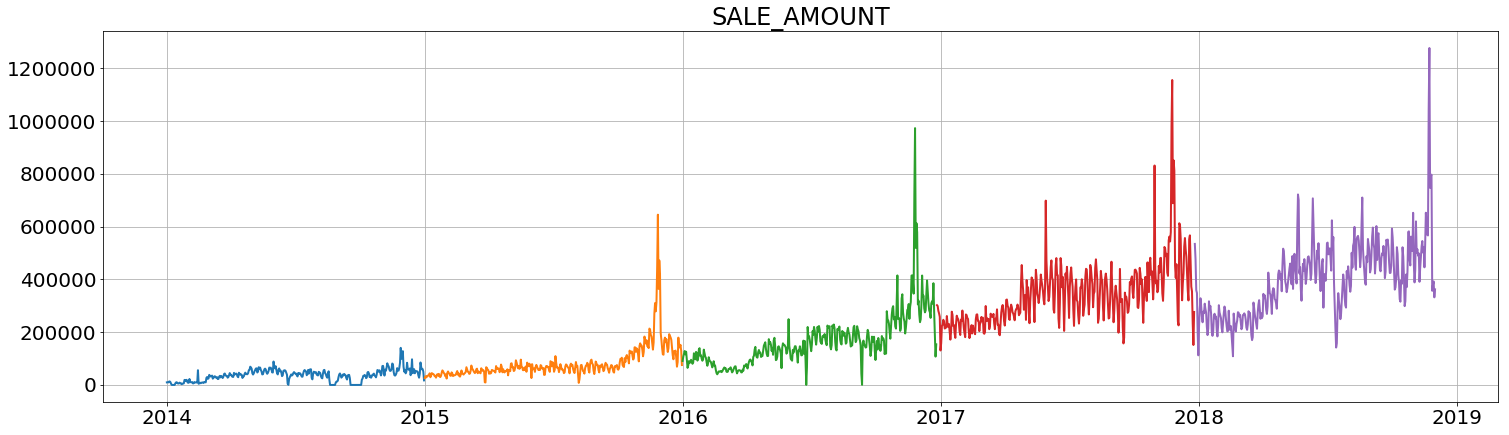

----------------------------------------------------------------------------------
NUMBER_OF_SOLD_ITEMS


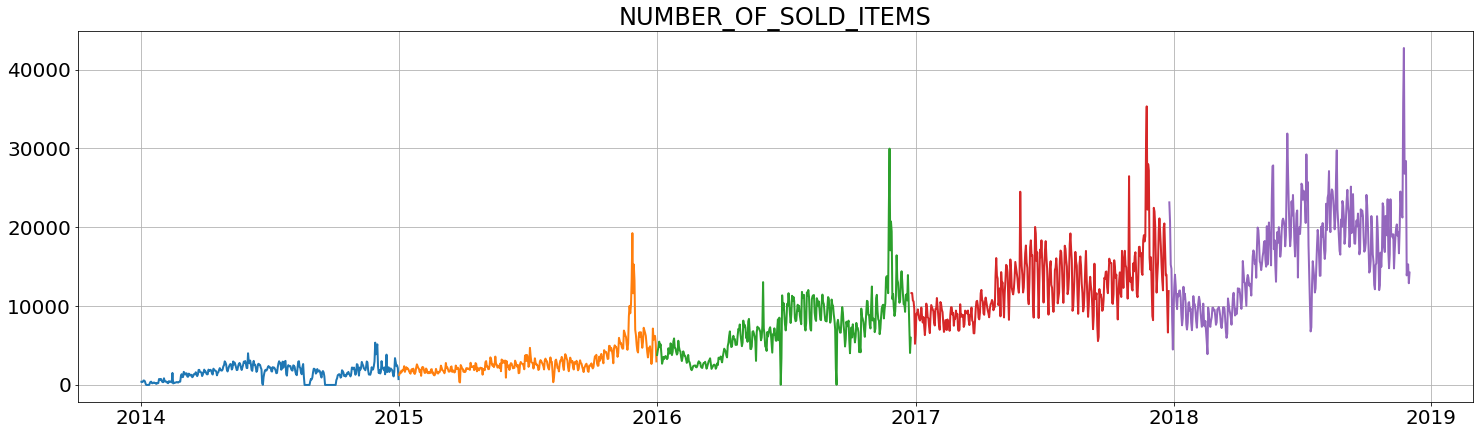

----------------------------------------------------------------------------------
NEW_CUSTOMER_COUNT


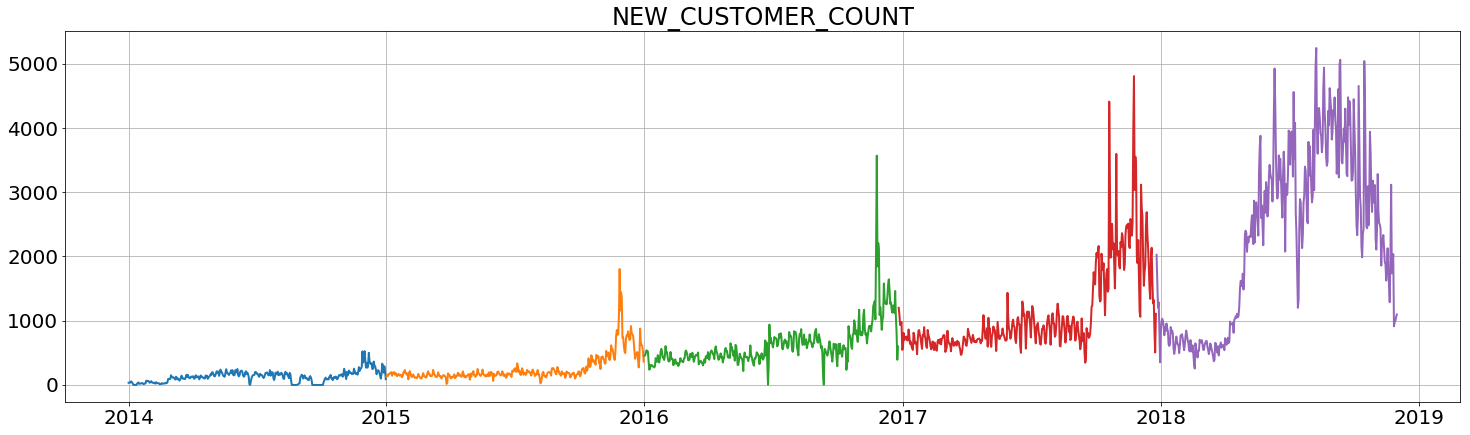

----------------------------------------------------------------------------------
NEW_CUSTOMER_VALUE


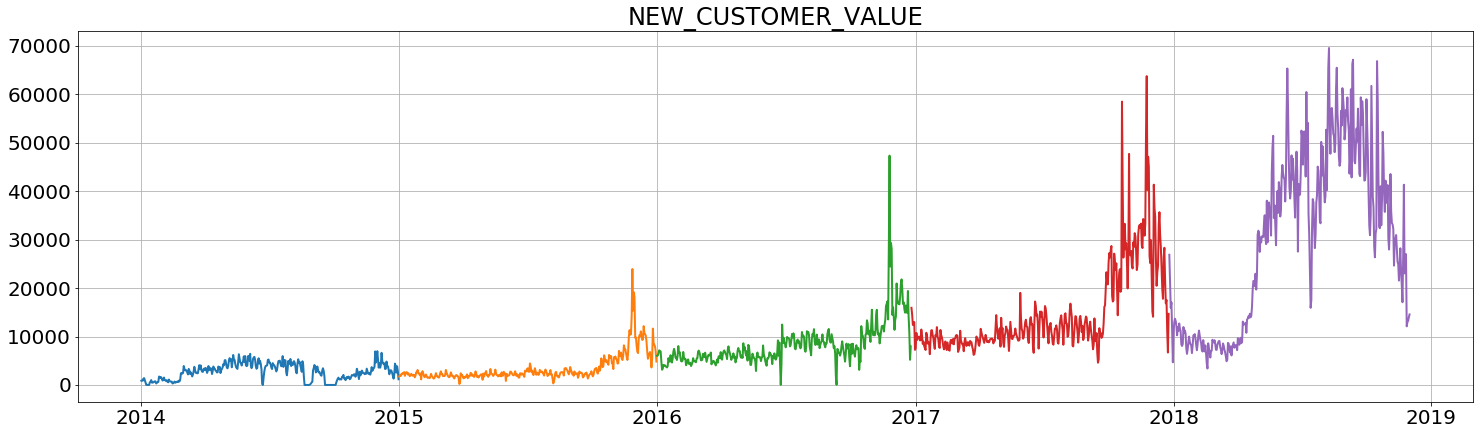

----------------------------------------------------------------------------------
NUMBER_OF_SALES


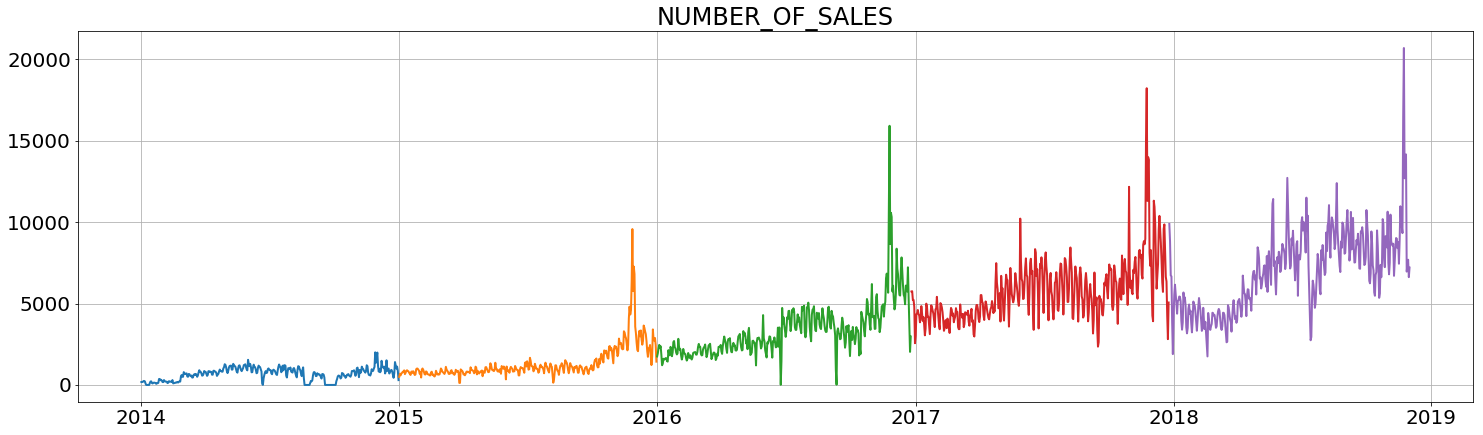

----------------------------------------------------------------------------------
BASE_EARNINGS_BEFORE_CANCELLATIONS


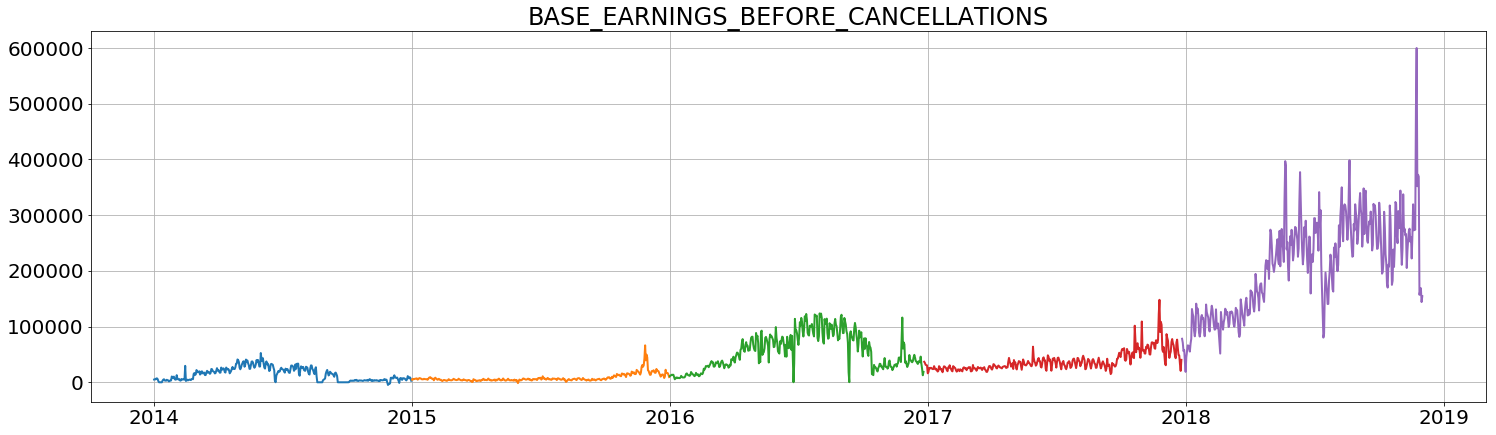

----------------------------------------------------------------------------------
BASE_EARNINGS_AFTER_CANCELLATIONS


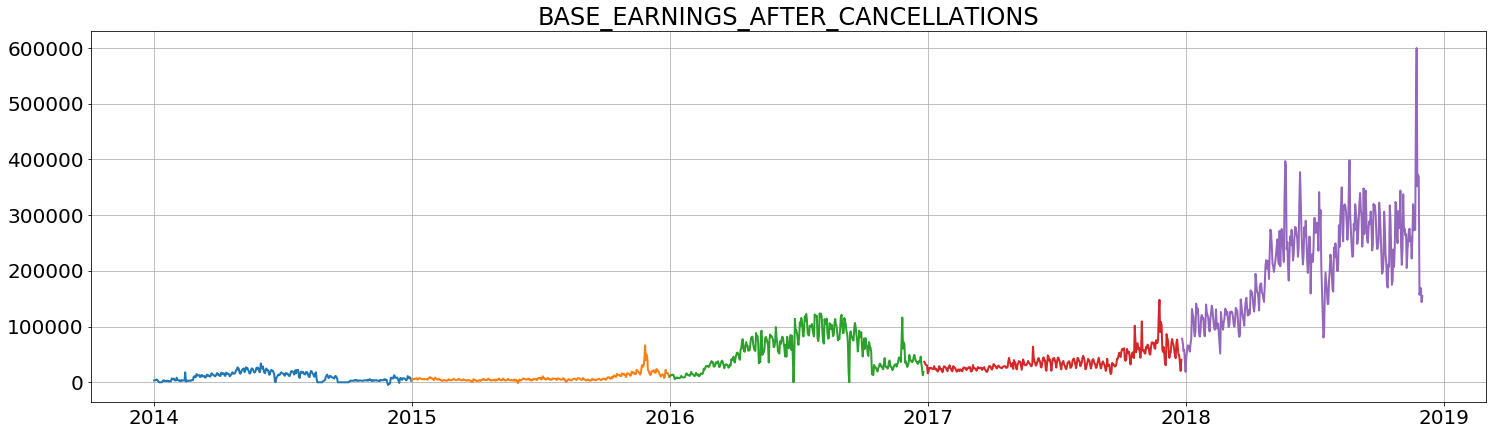

----------------------------------------------------------------------------------
MARGIN_BEFORE_CANCELLATIONS


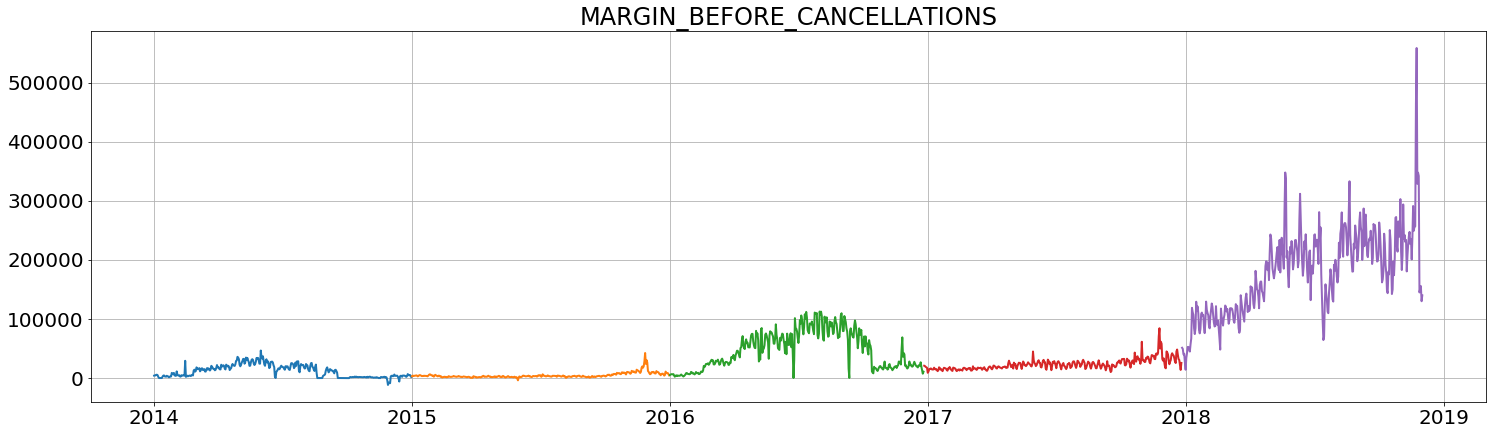

----------------------------------------------------------------------------------
MARGIN_AFTER_CANCELLATIONS


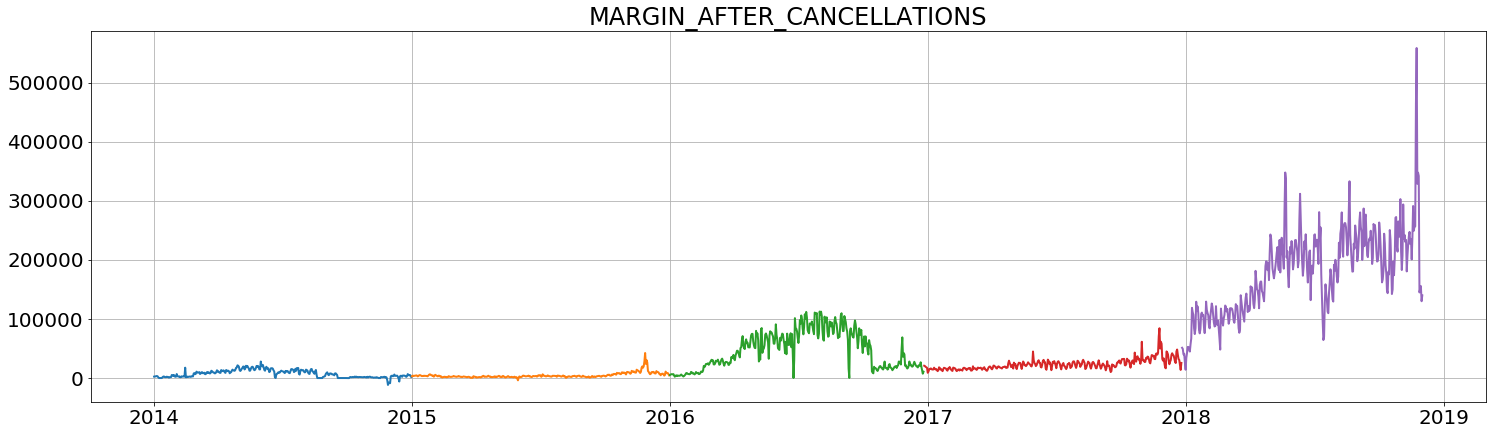

----------------------------------------------------------------------------------
EPC


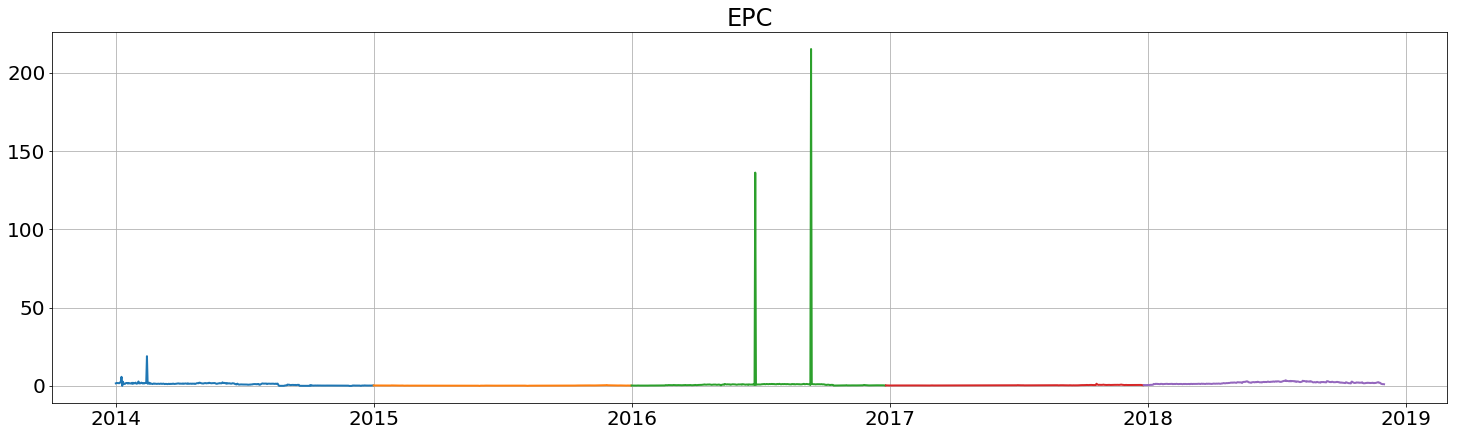

----------------------------------------------------------------------------------
CPC


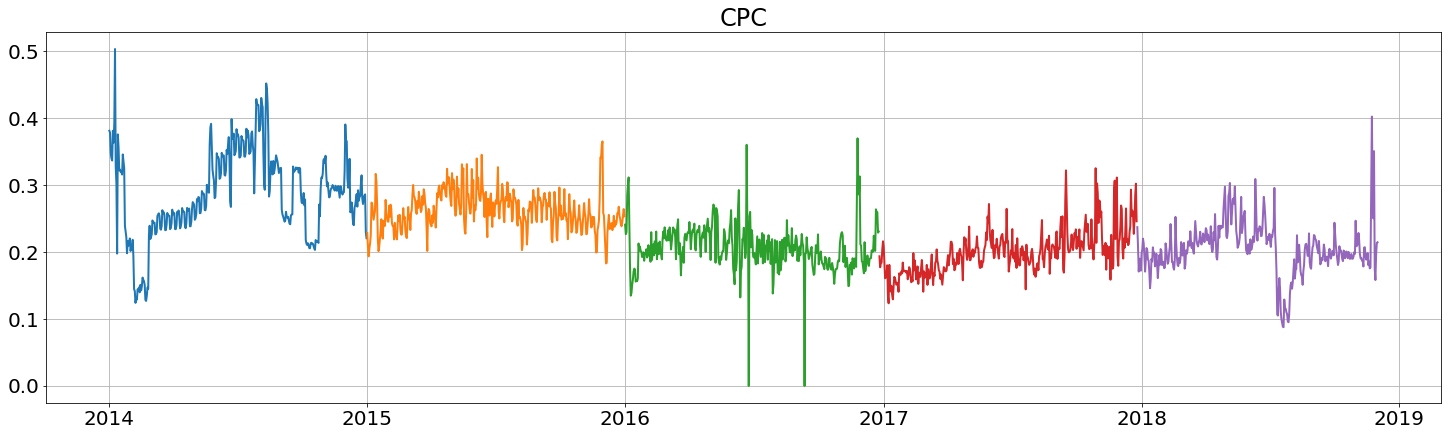

----------------------------------------------------------------------------------
CTR


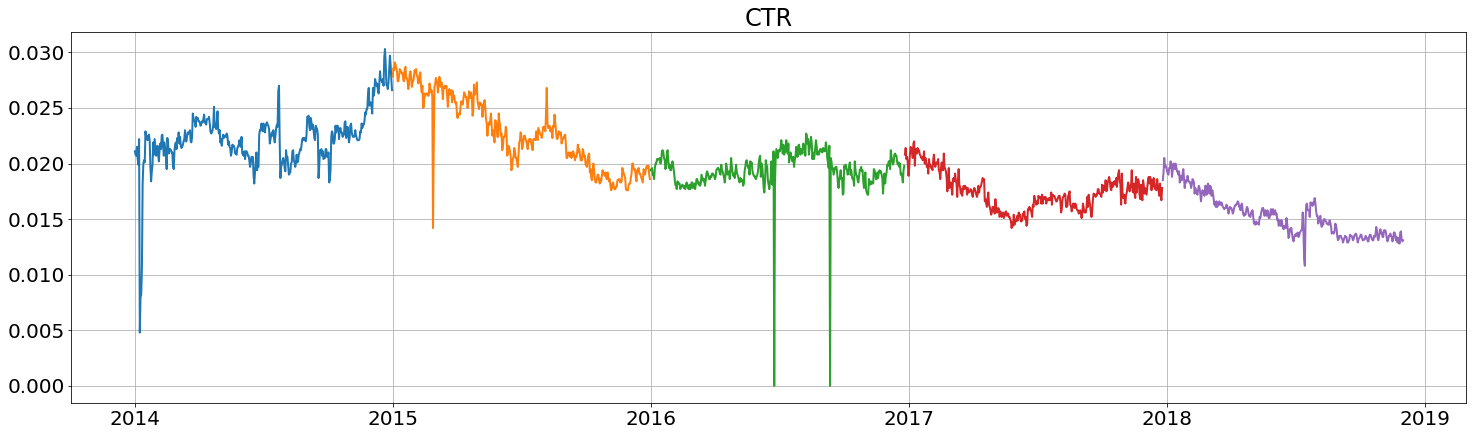

----------------------------------------------------------------------------------
CONVERSION_RATE


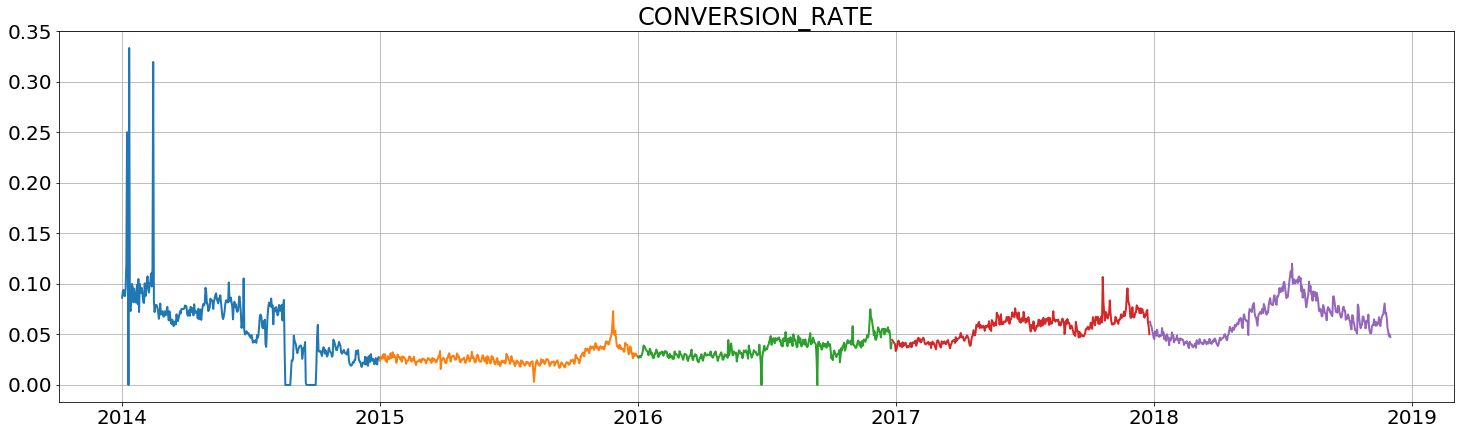

----------------------------------------------------------------------------------
COST


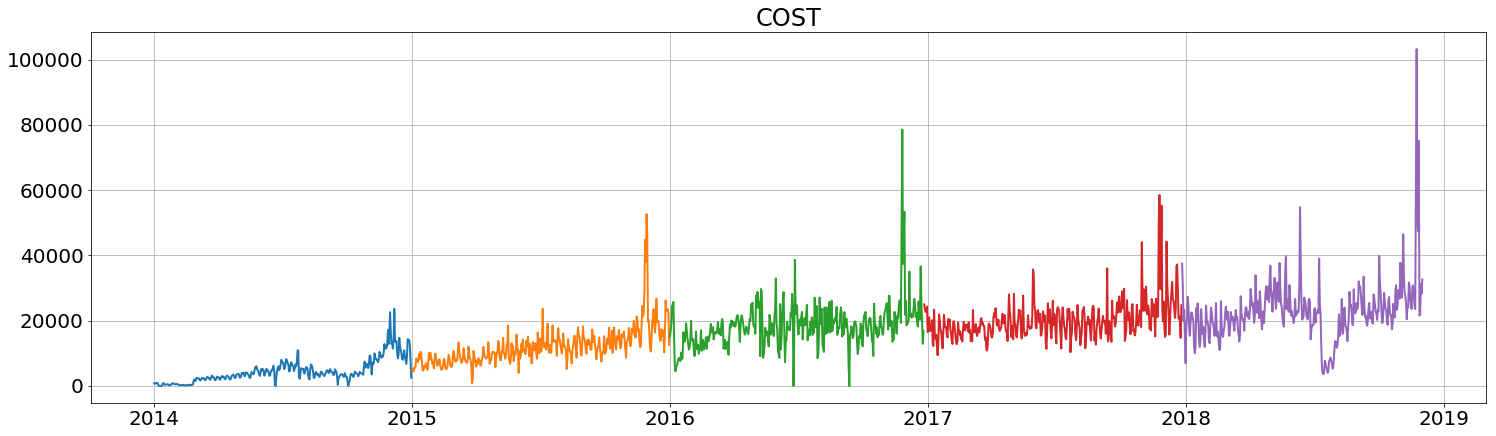

----------------------------------------------------------------------------------
CLICKS


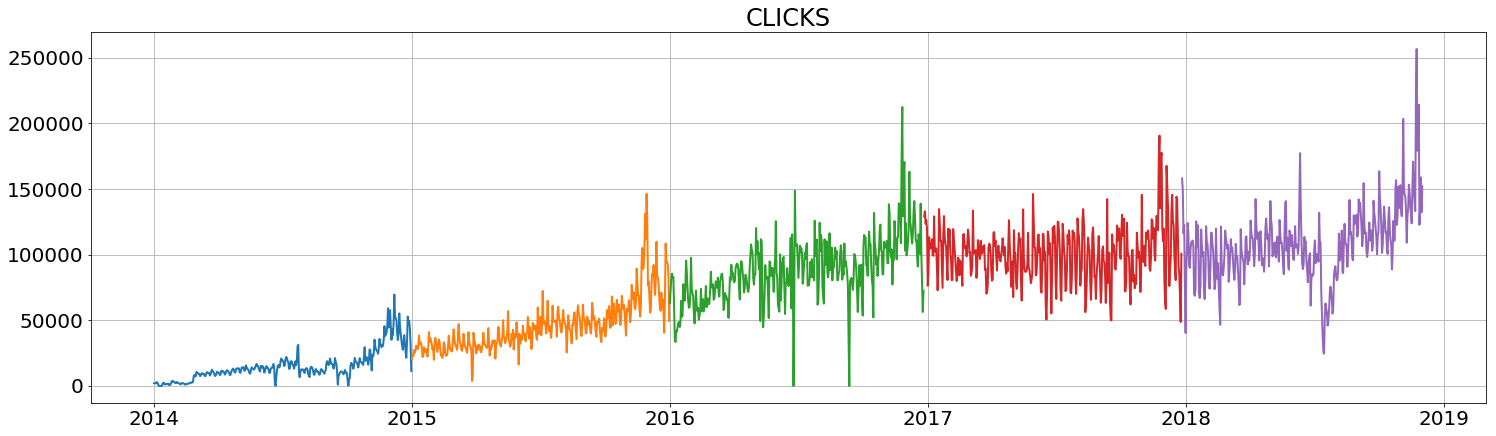

----------------------------------------------------------------------------------
IMPRESSIONS


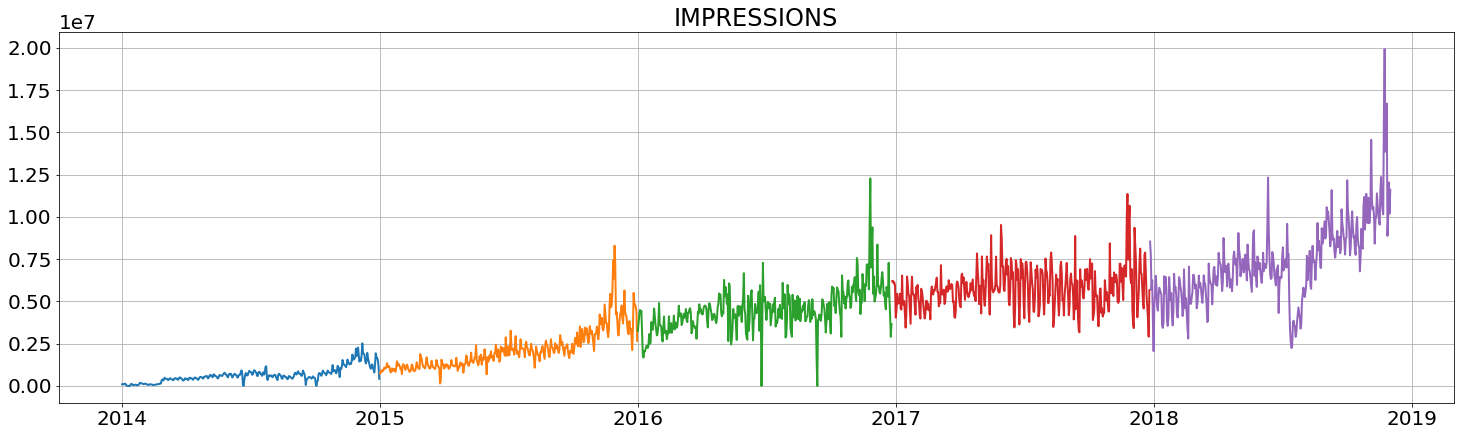

----------------------------------------------------------------------------------
CPO


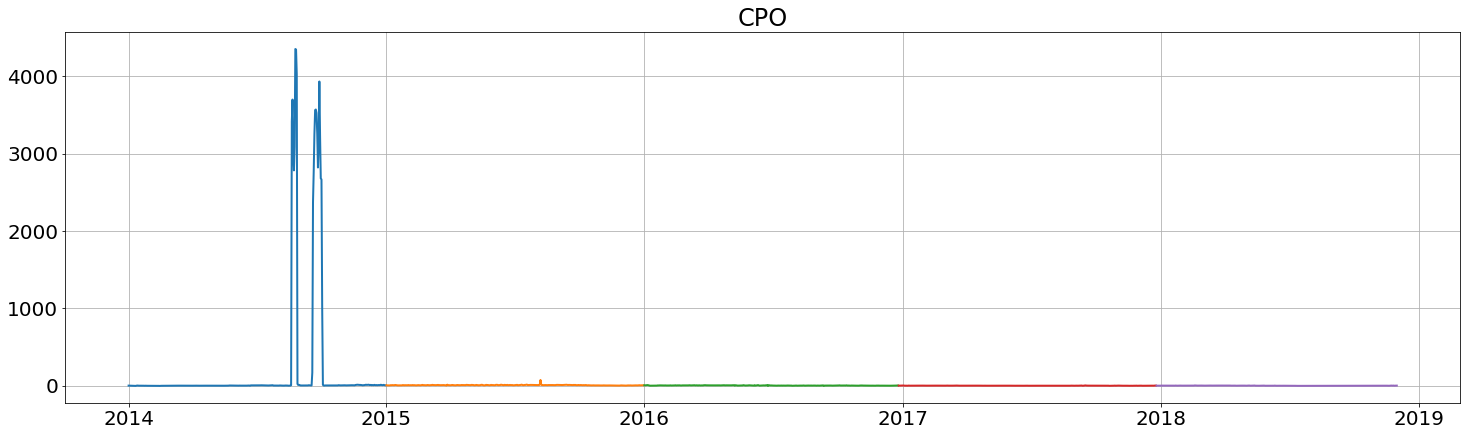

----------------------------------------------------------------------------------
WEEKDAY


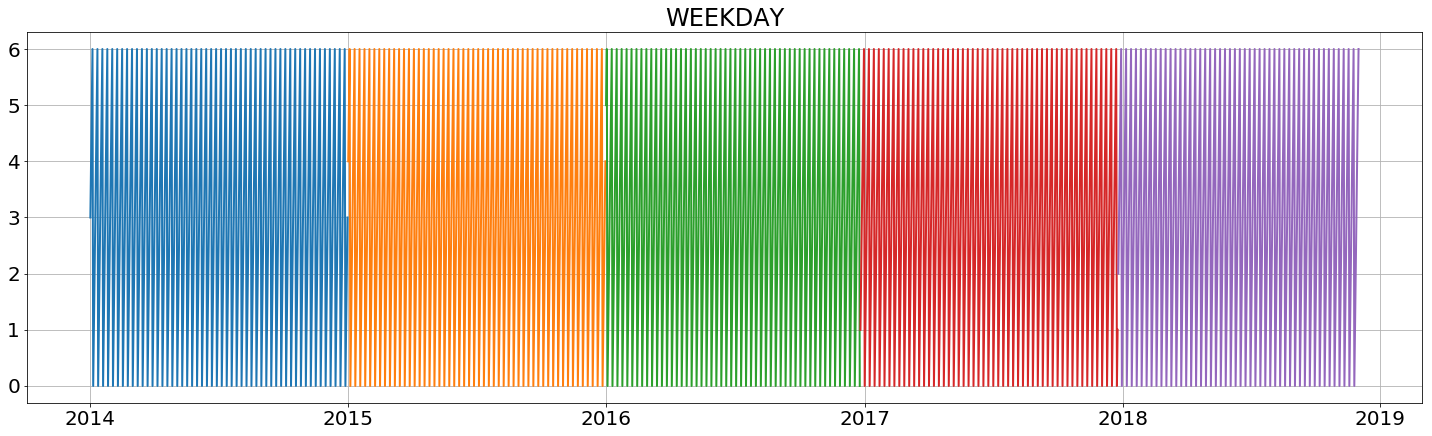

----------------------------------------------------------------------------------
PROFIT


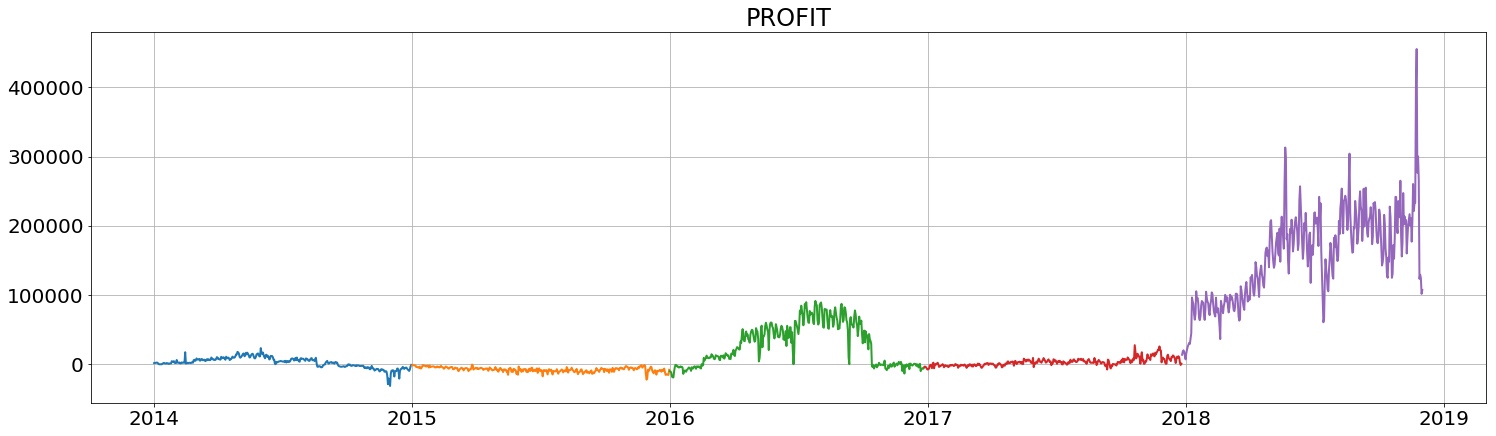

----------------------------------------------------------------------------------
CLV


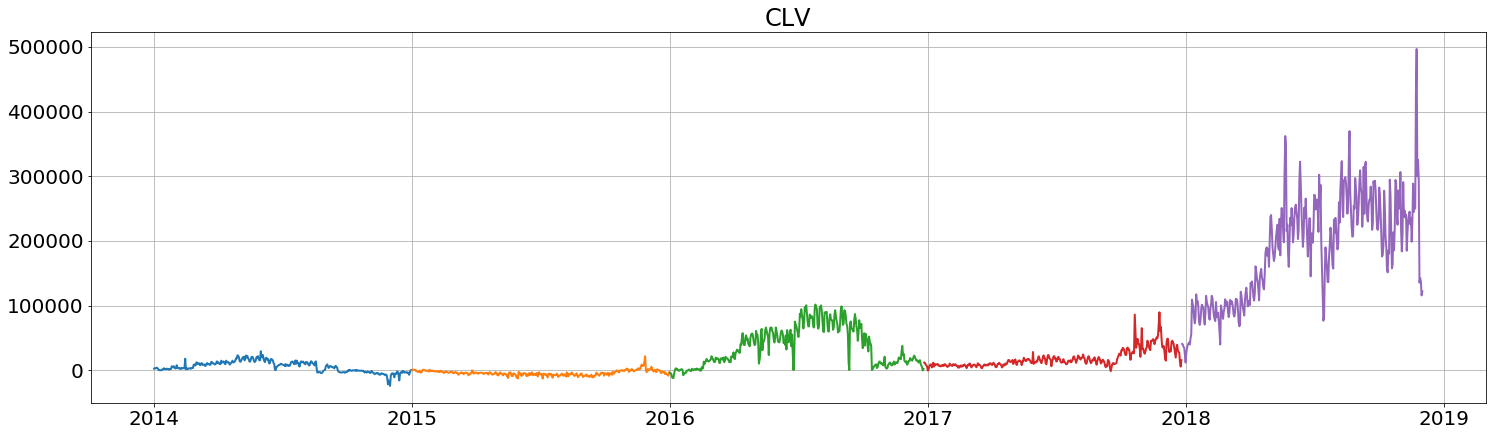

----------------------------------------------------------------------------------
COST_SALES_RATIO


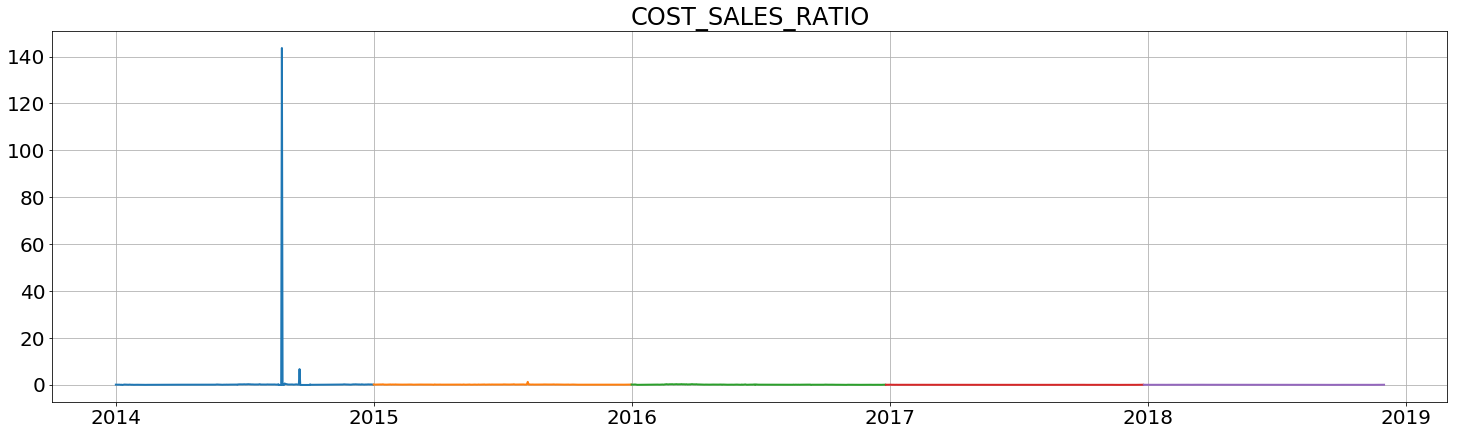

----------------------------------------------------------------------------------
ROI


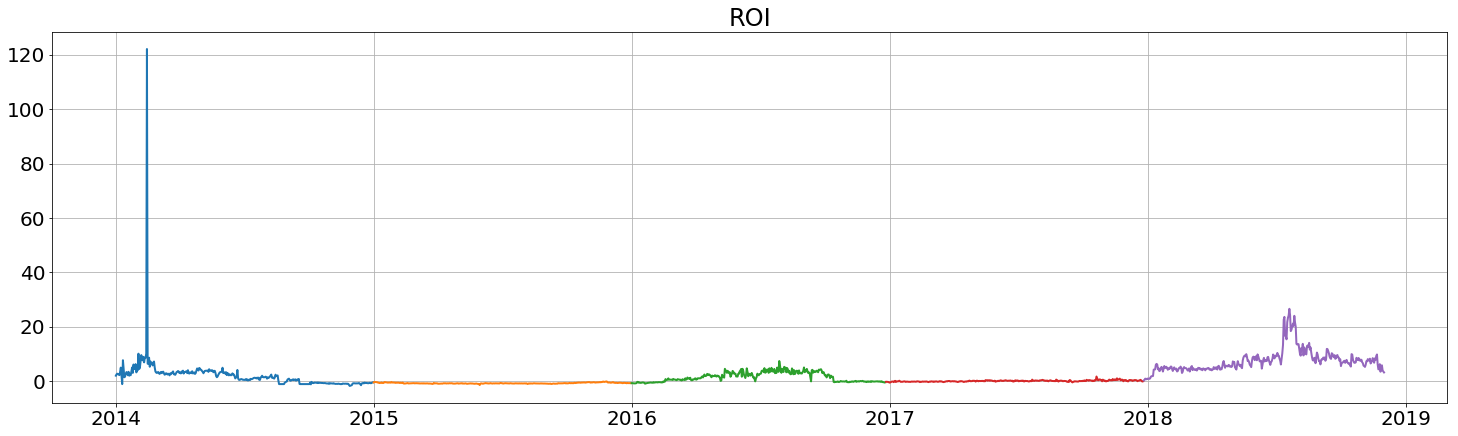

----------------------------------------------------------------------------------
AVERAGE_SALE_AMOUNT


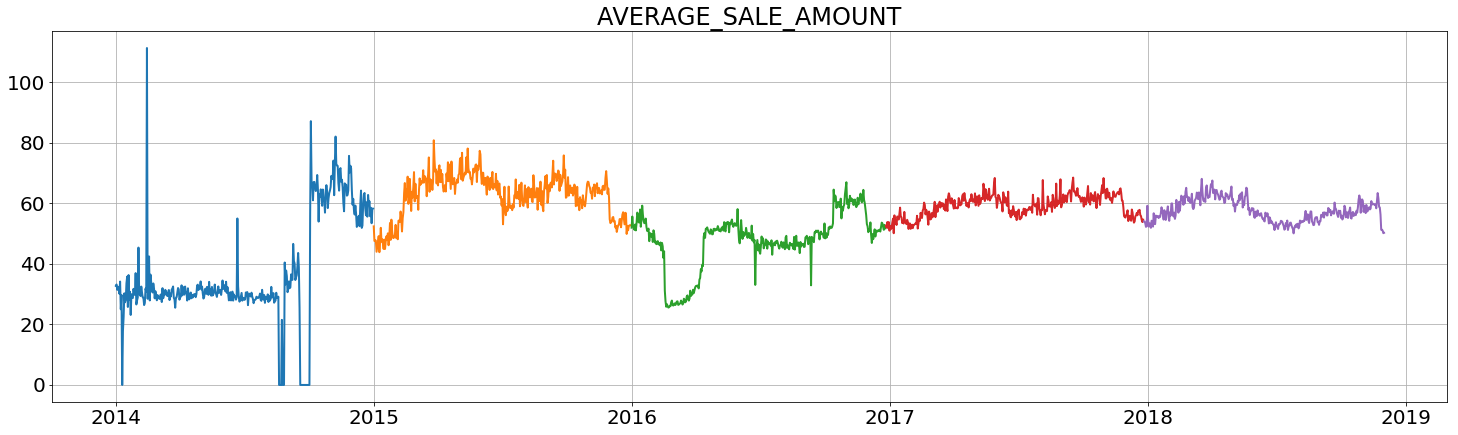

In [145]:
for f in df.columns:
    print('----------------------------------------------------------------------------------')
    print(f)
    plot_feature(df, f)

### Print histograms 

In [ ]:
for f in df.columns:
    if f != 'WEEKDAY':
        print('----------------------------------------------------------------------------------')
        print(f)
        plot_histogram_feature(df, f)

### Print seasonals decompositions

In [ ]:
for f in df.columns:
    if f != 'WEEKDAY':
        print('----------------------------------------------------------------------------------')
        print(f)
        plot_seasonal_for_feature(df, f)

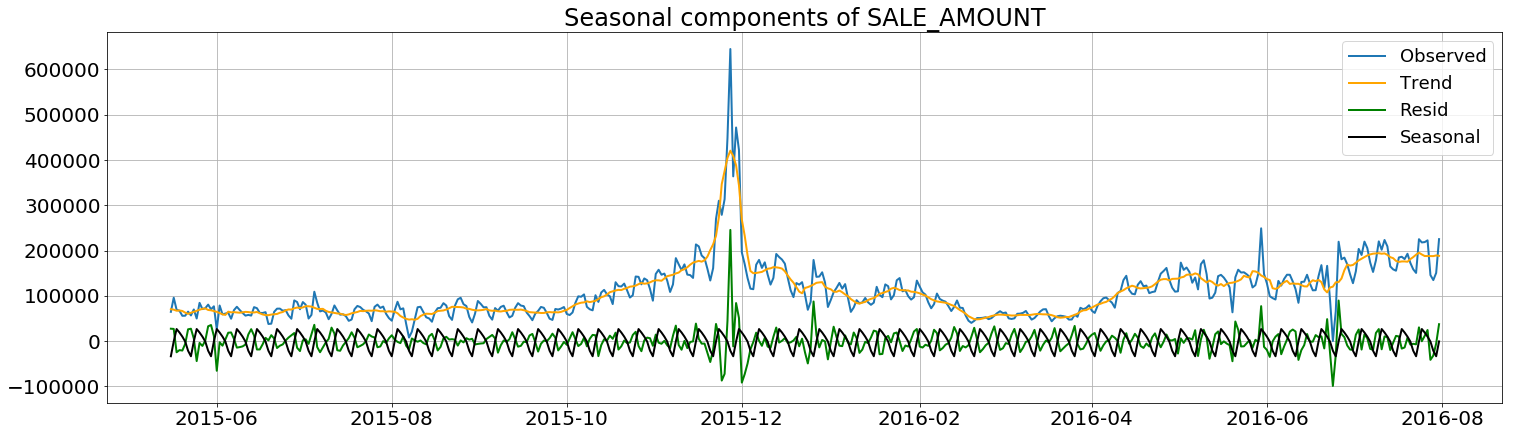

In [116]:
plot_seasonal_for_feature(df, 'SALE_AMOUNT')

### Seasonal decompose for df

In [8]:
def add_trend(data_df, feature, delete_original=False, index=1):
    df = data_df.copy()
    decompose_results = sm.tsa.seasonal_decompose(df[feature])
    trend = decompose_results.trend
    df.insert(index, 'trend_'+feature, trend)
    if delete_original == True:
        df = df.drop([feature], axis=1)
    df = df.dropna()
    return df

def add_resid(data_df, feature, delete_original=False, index=1):
    df = data_df.copy()
    decompose_results = sm.tsa.seasonal_decompose(df[feature])
    resid = decompose_results.resid
    df.insert(index, 'resid_'+feature, resid)
    if delete_original == True:
        df = df.drop([feature], axis=1)
    df = df.dropna()
    return df

def add_seasonal(data_df, feature, delete_original=False, index=1):
    df = data_df.copy()
    decompose_results = sm.tsa.seasonal_decompose(df[feature])
    seasonal = decompose_results.seasonal
    df.insert(index, 'seasonal_'+feature, seasonal)
    if delete_original == True:
        df = df.drop([feature], axis=1)
    df = df.dropna()
    return df

## Check for sationarity

In [9]:
# Null hypothesis: is stationary
def is_stationary(X): # = not able to reject null hypothesis
    # Null hypothesis: x is stationary (not trend stationary); Note: test tends to reject too often
    kpss_stat, p_value, lags, critical_values = statsmodels.tsa.stattools.kpss(X)
    return abs(kpss_stat) < abs(critical_values['5%'])
    # Same as return p_value >= 0.05

In [ ]:
for f in df.columns:
    s_df = add_resid(df, f)
    s_df = add_trend(s_df, f)
    s_df = add_seasonal(s_df, f)
    print(f)
    print('Observed: ' + str(is_stationary(s_df[f])))
    print('Trend: ' + str(is_stationary(s_df['trend_'+f])))
    print('Resid: ' + str(is_stationary(s_df['resid_'+f])))
    print('--------------------------') 

## Plot ACF and PACF

In [ ]:
for f in df.columns[:5]:
    series = df[f]
    print('----------------------------------------------------------------------------------------------------')
    plot_acf(series, lags=1600)
    plot_pacf(series, lags=5)
    plt.title(f)
    plt.show()

In [15]:
new_df = load_file('../../Data/ASOS_GB.csv')
print_info_df(new_df, False)

Number of days is 153 from 2018-07-01 00:00:00 to 2018-12-01 00:00:00
The shape of the data: 154*23
Check for Nan values: False
Number of columns: 23


In [ ]:
for f in new_df.columns:
    print('----------------------------------------------------------------------------------')
    print(f)
    plot_feature(new_df, f)